# 第2章：感知机
在这一章，用python通过原生代码与scikit-learn库中的感知机模型两种方法实现感知机，数据集采用iris（鸢尾花）数据集。

原生代码实现的感知机算法为对偶形式，即算法2.2。

### 优化算法——随机梯度下降（Stochastic Gradient Descent, SGD）
原始形式下的$w,b$更新方式为：

$w = w + \eta y_ix_i$

$b = b + \eta y_i$

当初始值$w_0,b_0$均为0时，对上面更新方式进行修改，设修改n次，则$w,b关于(x_i,y_i)$的增量分别为$a_iy_ix_i和a_iy_i$，这里$a_i=n_i\eta$。那么我们的$w,b$就可以表示为：

$w = \sum_{i=1}^{N}{a_iy_ix_i}$

$b = \sum_{i=1}^{N}{a_iy_i}$

这里，$a_i \geq 0, i=1,2,...,N$, 当$\eta = 1$时，$a_i$就表示为第$i$个实例点由于误分类而进行更新的次数。实例点更新次数越多，也就意味着它距离分离超平面越近了。

在代码中，不断更新$a_i,b$:

$a_i = a_i + \eta$

$b = b + \eta y_i$

求得$a,b$后，我们最终的$w,b$为：

$w = a \cdot x \cdot y$

$b = b$


那么我们的感知机模型就变为：

dual form model: $f(x) = sign(\sum_{j=1}^{N}{a_jy_jx_j} \cdot x+b)$

### Code
使用iris数据集两个分类的数据，特征为[sepal length, sepal width]。

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
# load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

# reset columns name
iris_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

# count the numbel of each category
iris_df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [3]:
# select the data we are interested in
data = np.array(iris_df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]

# set y to the perceptron label [-1, 1]
y = np.array([1 if i == 1 else -1 for i in y])

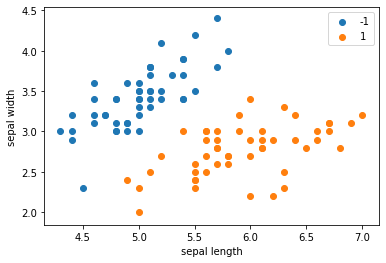

In [4]:
# visualize the data we have selected
plt.scatter(X[:50, 0], X[:50, 1], label='-1')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Perceptron-dual norm

In [5]:
class Model:
    def __init__(self):
        self.a = np.zeros(data.shape[0], dtype=np.float32)
        self.b = 0
        self.learning_rate = 1
        self.w = 0
        
    def sign(self, a, y, x_Ganm, b):
        z = sum(a * y * x_Ganm) + b
        return z
    
    def sgd(self, X_train, y_train):
        is_wrong = True
        X_train = np.mat(X_train)
        x_Ganm = np.dot(X_train, X_train.T)
        train_count = 0
        while is_wrong:
            wrong_count = 0
            train_count += 1
            for i in range(len(X_train)):
                if y_train[i] * self.sign(self.a, y_train, x_Ganm[:, i], self.b) <=0:
                    self.a[i] = self.a[i] + self.learning_rate
                    self.b = self.b + self.learning_rate * y_train[i]
                    wrong_count += 1
            if wrong_count == 0 or train_count >= 1000:
                is_wrong = False
                self.w = sum(self.a * y_train * X_train)
        return 'Dual Norm Perceptron Model!'

In [6]:
perceptron = Model()
perceptron.sgd(X, y)

'Dual Norm Perceptron Model!'

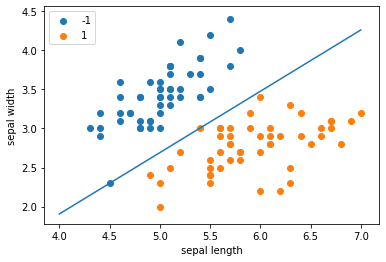

In [7]:
# visualize the perceptron we have got
x1_points = np.linspace(4, 7, 10)
x2_points = -(perceptron.w[:, 0] * x1_points + perceptron.b) / perceptron.w[:, 1]  # w[0] * x1 +w[1] * x2 + b = 0
plt.plot(x1_points, x2_points.T)

plt.scatter(X[:50, 0], X[:50, 1], label='-1') # scatter: draw a scatter plot
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()